# Numerical Ordinary Differential Equations and Applications
## Computer Programming Assignment 1: Curves of Pursuit

D. J. Higham and H. Yorston, 
School of Mathematics, University of Edinburgh, 2023

In this first computer programming assignment we will investigate curves of pursuit with the Euler method. This is a template Jupyter notebook that (i) gets you started and (ii) sets the four tasks that make up the assignment.
In order to complete the assigment, you must perform the four tasks by editing and/or adding further content to this notebook.
Any figure that you produce should have labeled axes, a title, and where appropriate, a legend to distinguish between plots. Python code should include comments, in the manner of the examples provided here.
To submit your completed work (a) create a pdf version of the notebook when all cells have been run (on a Mac/Safari system this may be done via "File", "Print Preview" and "Export as PDF"), (b) submit both the .ipynb and .pdf versions" electronically on **Learn**. Hence, you are asked to submit two files: a Jupyter notebook and the corresponding pdf version. If there is any inconsistency between the two files, we will regard the .ipynb version as your definitive submission. Make sure that your name is clearly indicated at the top of notebook.
The deadline is **midday on Friday 17th February** and, as for all continuous assessment in this course, **there are no extensions and standard University of Edinburgh penalties apply for late submission**. Please keep a record of your **electronic submission receipt**.

### Academic misconduct

You are expected to be aware of and abide by University policies on academic misconduct.

- [School of Mathematics academic misconduct advice and policies](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)
- [Academic Services academic misconduct information](https://www.ed.ac.uk/academic-services/students/conduct/academic-misconduct)


First we will import some modules.

In [2]:
# Import the required modules
import numpy as np                # scientific library
import matplotlib.pyplot as plt   # for creating plots

### Puppy Sees Kitten

*Curves of pursuit* arise in many contexts where there is a moving target. Suppose a playful puppy meets a kitten in the garden. We will assume that, in an attempt to evade the puppy, the kitten follows a predefined path $(r(t),s(t))$. We will also assume that (a) the puppy moves at a speed that is a constant factor $k$ times the speed of the kitten and (b) the puppy chases in such a way that at all times its tangent points at the kitten. It is then possible to show that the path $(x(t),y(t))$ of the puppy satisfies a system of two ODEs 

$$  
x'(t) = R(t) \left( r(t) - x(t) \right),
$$
$$
y'(t) = R(t) \left( s(t) - y(t) \right),
$$
where
$$
 R(t) = \frac{ k \sqrt{ r'(t)^2 + s'(t)^2} }{ \sqrt{ (r(t) - x(t))^2  + (s(t) - y(t))^2} }.
$$

Suppose that initially, at time $t = 0$, the puppy is located at $(0,3)$
Also suppose that the kitten follows the arc of a circle
$$
 r(t) = 5 - 3 \cos(t),
$$
$$
 s(t) = -3 \sin(t).
$$
 
(Deriving this ODE system will be the subject of the Q&A sheet for week 4.)
 
In the code below we apply the Euler method to this ODE system in the case where $k = 0.9$. We simulate over $ 0 \le t \le 5$ with a stepsize of $h = 0.01$. We have tried to make the code as simple as possible to follow. Note that we have used a while loop, rather than a for loop. Also, we update the numerical solution from one time point to the next by appending to an array. This structure is natural for the tasks that follow.  

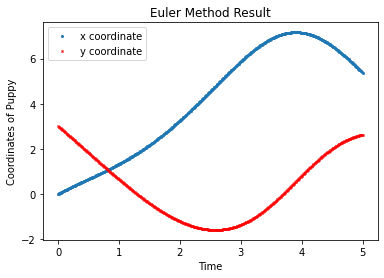

In [3]:
xzero = 0.    # initial x value of puppy
yzero = 3.    # initial y value of puppy
T = 5.        # final value of t  
h = 0.01      # stepsize

k = 0.9
t = 0.

x = [xzero]
y = [yzero]

n = 0  # number of steps taken so far

while t < T:              # the while loop structure will be useful for the tasks
    ##### Evaluate RHS of ODE system #####
    r = 5 - 3*np.cos(t)  # current x coord of kitten
    s = -3*np.sin(t)     # current y coord of kitten
    
    rprime = 3*np.sin(t)   # time deriv of r
    sprime = -3*np.cos(t)  # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r - x[n])**2 + (s - y[n])**2)
    R = numerator/denom
    xprime = R*(r-x[n])  # first component of ODE
    yprime = R*(s-y[n])  # second component of ODE
    #####################################
    
    ##### Take one step of Euler #######
    x.append(x[n] + h*xprime)
    y.append(y[n] + h*yprime)
                 
    # Update variables
    n += 1
    t += h
                 
# plot the solution
N = len(x)                  # number of points in the path that we computed
tvals = np.linspace(0,T,N)  # t values along the path

plt.plot(tvals, x, 'o', markersize=2, label = 'x coordinate')
plt.plot(tvals, y, 'rx', markersize=2, label = 'y coordinate')
plt.xlabel('Time')
plt.ylabel(r'Coordinates of Puppy')
plt.title('Euler Method Result')
plt.legend()
plt.show()

### Phase Plane
To get a better feel for the behaviour of the puppy, we now produce a *phase plane* picture; that is, plot $x(t)$ on the x-axis against $y(t)$ on the y-axis. We also superimpose the path taken by the kitten on the same picture.


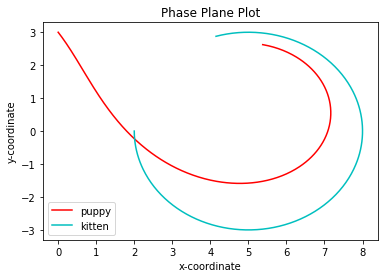

In [4]:
#We haven't stored the kitten's path
#So have to recompute it
rvals = 5 - 3*np.cos(tvals)  # x coords of puppy
svals = -3*np.sin(tvals)     # y coords of puppy
plt.plot(x, y,'r-', markersize=2, label = 'puppy')
plt.plot(rvals, svals,'c-', markersize=4, label = 'kitten')

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Phase Plane Plot')
plt.legend()
plt.show()

# Task 1

[4 marks]

The ODE system breaks down if $x(t) = r(t)$ and $y(t) = s(t)$. This makes sense---if the puppy and kitten are at the same point then the puppy can no longer move towards the kitten. In the case where $k > 1$ we would expect the puppy to catch up with the kitten at some finite time. Computationally, we can simulate the system until the puppy gets *sufficiently close* to the kitten. 

We will let $t^\star$ denote the first time that the Euclidean distance between the puupy and kitten reaches ${10}^{-3}$. Using the value $k = 1.25$ (and using the same starting point for the puppy, the same path for the kitten and the same stepsize as in the example above), (a) compute and display an estimate for $t^\star$ and (b) produce a new phase-plane figure that shows the paths of the puppy and kitten.

Hint: you can copy and paste the code above, and then make the appropriate edits. You may wish to alter the while loop so that you have something of the form "while the puppy and kitten are more than Euclidean distance $10^{-3}$ apart". 

estimate for t^* =  3.5899999999999674


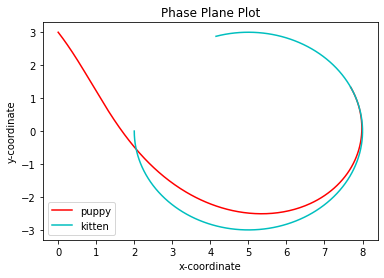

In [15]:
xzero = 0.    # initial x value of puppy
yzero = 3.    # initial y value of puppy
T = 5.        # final value of t  
h = 0.01      # stepsize
tol = 10**-3
k = 1.25
t_1 = 0.
Dis = np.sqrt((3-0)**2+(0-2)**2)
x = [xzero]
y = [yzero]

n = 0  # number of steps taken so far

while Dis > tol:              # the while loop structure will be useful for the tasks
    ##### Evaluate RHS of ODE system #####
    r = 5 - 3*np.cos(t_1)  # current x coord of kitten
    s = -3*np.sin(t_1)     # current y coord of kitten
    
    rprime = 3*np.sin(t_1)   # time deriv of r
    sprime = -3*np.cos(t_1)  # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r - x[n])**2 + (s - y[n])**2)
    R = numerator/denom
    xprime = R*(r-x[n])  # first component of ODE
    yprime = R*(s-y[n])  # second component of ODE
    #####################################
    
    
    ##### Take one step of Euler #######
    x.append(x[n] + h*xprime)
    y.append(y[n] + h*yprime)
    
             
    # Update variables
    n += 1
    t_1 += h
    Dis = denom
    
print('estimate for t^* = ',t_1-h)

N = len(x)                  # number of points in the path that we computed
tvals = np.linspace(0,T,N)

rvals = 5 - 3*np.cos(tvals)  # x coords of puppy
svals = -3*np.sin(tvals)     # y coords of puppy
plt.plot(x, y,'r-', markersize=2, label = 'puppy')
plt.plot(rvals, svals,'c-', markersize=4, label = 'kitten')

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Phase Plane Plot')
plt.legend()
plt.show()


# Task 2

[6 marks]


Your next task is to check the value of $t^\star$ that you computed in Task 1 by repeating the computation for smaller values of the stepsize: try ${10}^{-3}$,..,${10}^{-5}$ (and, optionally, ${10}^{-6}$ if your computer is fast enough). By referring to your computational results, give an approximation to $t^\star$ that you are confident is accurate to three significant figures. How does the error in your approximation appear to behave as a function of the stepsize? 

Hint: you could use the *input* command to allow the user to specify the variable h, and then observe and report the $t^\star$ approximations that arise for different choices. More experienced Python users may wish to create a function that takes a value of $h$ and returns a value of $t^\star$.


In [16]:

H = [1e-3,1e-4,1e-5,1e-6]

def find_t(h):
    xzero = 0.    # initial x value of puppy
    yzero = 3.
    T = 10.
    tol = 10**-3 
    k = 1.25
    t_1 = 0.
    Dis = 3
    x = [xzero]
    y = [yzero]
    n = 0

    while Dis > tol:              # the while loop structure will be useful for the tasks
        ##### Evaluate RHS of ODE system #####
        r = 5 - 3*np.cos(t_1)  # current x coord of kitten
        s = -3*np.sin(t_1)     # current y coord of kitten
        
        rprime = 3*np.sin(t_1)   # time deriv of r
        sprime = -3*np.cos(t_1)  # time deriv of s
        
        numerator = k*np.sqrt(rprime**2 + sprime**2)
        denom = np.sqrt((r - x[n])**2 + (s - y[n])**2)
        R = numerator/denom
        xprime = R*(r-x[n])  # first component of ODE
        yprime = R*(s-y[n])  # second component of ODE
        #####################################
        
        ##### Take one step of Euler #######
        x.append(x[n] + h*xprime)
        y.append(y[n] + h*yprime)
        # Dis = np.sqrt((r-)**2+(y[n]-svals[n])**2)       
        # Update variables
        n += 1
        t_1 += h
        Dis = denom
    return t_1-h

In [17]:
Res= []
for h in H:
    Res.append(find_t(h))

for i in range(4):
    print('For h = {} t^* = {}\n'.format(H[i],Res[i]))

For h = 0.001 t^* = 3.575999999999717

For h = 0.0001 t^* = 3.574100000003118

For h = 1e-05 t^* = 3.5739700000149464

For h = 1e-06 t^* = 3.5739470001456546



In [18]:
# Define the excat value for t 
EXCAT_Value=Res[3]
#Compute the error
ERR=[np.absolute(EXCAT_Value-Res[0]),np.absolute(EXCAT_Value-Res[1]),np.absolute(EXCAT_Value-Res[2])]


In [19]:
import pandas as pd
#use table to print the error for different h
df = pd.DataFrame(data=H[0:3],columns=['h'])
df['Error']=ERR
df



,h,Error
0,0.00100,0.002053
1,0.00010,0.000153
2,0.00001,0.000023


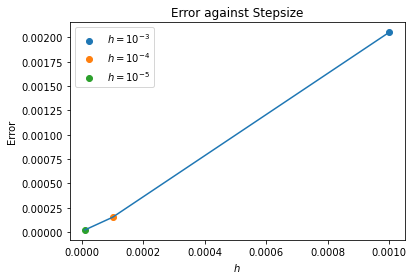

In [20]:
#plot the graph for error in different h
plt.plot(H[0:3],ERR)
plt.scatter(H[0],ERR[0],label=r'$h=10^{-3}$')
plt.scatter(H[1],ERR[1],label=r'$h=10^{-4}$')
plt.scatter(H[2],ERR[2],label=r'$h=10^{-5}$')
plt.xlabel(r'$h$')
plt.ylabel('Error')
plt.title('Error against Stepsize')
plt.legend()

Your estimate for $t^\star$ and how you arrived at it:

My estimate for $t^\star$ to three significant figures is 3.57. This is arrived by campare the result for under different stepsize from $10^-3$ to $10^-6$. Since all the result have same value under 3sf Then it means it converge to 3.57.

Your observation concerning how the error behaves as a function of the stepsize:

From the plot and table we can noticed that as the stepsize $h$ decreases the error is also decreasing. Since the error is is find by taking the absolute value of the difference between $t^\star$ at given $h$ and $t^\star$ at $h=10^{-6}$. The error is seems to be scaled by the stepsize and seems to approach a fixed value.



# Task 3

[3 marks]

Make up your own pair of functions $r(t)$ and $s(t)$ and choose values for $k$, $T$ and the initial location of the puppy. Plot the resulting phase diagram. Anything that is correctly implemented and looks different to the example above will be fine.


Suppose that initially, at time $t = 0$, the puppy is located at $(0,0)$
Also suppose that the kitten follows the arc of a circle
$$
 r(t) = 2 - 3 \sin(t),
$$
$$
 s(t) = \cos(t).
$$
$$K=1$$
$$T=10$$


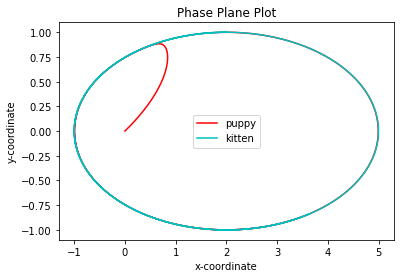

In [21]:
xzero = 0.    # initial x value of puppy
yzero = 0.    # initial y value of puppy
T = 10       # final value of t  
h = 0.001     # stepsize
tol = 10**-3
k = 1
t_1 = 0.
Dis = np.sqrt((2-0)**2+(0-1)**2)
x = [xzero]
y = [yzero]

n = 0  # number of steps taken so far

while t_1 < T:              # the while loop structure will be useful for the tasks
    ##### Evaluate RHS of ODE system #####
    r = 2 - 3*np.sin(t_1)  # current x coord of kitten
    s = np.cos(t_1)     # current y coord of kitten
    
    rprime = -3*np.cos(t_1)   # time deriv of r
    sprime = -np.sin(t_1)  # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r - x[n])**2 + (s - y[n])**2)
    R = numerator/denom
    xprime = R*(r-x[n])  # first component of ODE
    yprime = R*(s-y[n])  # second component of ODE
    #####################################
    
    
    ##### Take one step of Euler #######
    x.append(x[n] + h*xprime)
    y.append(y[n] + h*yprime)
    # Dis = np.sqrt((r-)**2+(y[n]-svals[n])**2)
    
             
    # Update variables
    n += 1
    t_1 += h


N = len(x)                  # number of points in the path that we computed
tvals = np.linspace(0,T,N)

rvals = 2 - 3*np.sin(tvals)  # x coords of puppy
svals = np.cos(tvals)     # y coords of puppy
plt.plot(x, y,'r-', markersize=2, label = 'puppy')
plt.plot(rvals, svals,'c-', markersize=4, label = 'kitten')

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Phase Plane Plot')
plt.legend()
plt.show()


# Task 4

[7 marks]

Suppose that the puppy starts at the point $(0,2)$. Suppose also that the kitten starts at the point $(2,0)$ and heads in a straight line along the positive horizontal axis. Finally, suppose that $k=1$, so that both animals have the same speed. 

In this circumstance, it can be shown that as $t \to \infty$ the distance between the two animals converges to a fixed value, $d^\star$. Conduct an experiment to determine $d^\star$ to three significant figures. As well as writing the python code and reporting your answer, briefly (i.e., in one or two sentences) discuss the sources of error in your computation. 

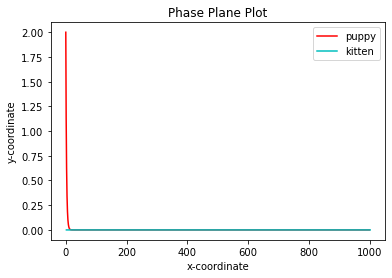

In [39]:

xzero = 0.    # initial x value of puppy
yzero = 2.    # initial y value of puppy
T = 1000       # final value of t  
h = 0.00005     # stepsize
tol = 10**-3
k = 1
t_1 = 0.
x = [xzero]
y = [yzero]

n = 0  # number of steps taken so far

while t_1 < T:              # the while loop structure will be useful for the tasks
    ##### Evaluate RHS of ODE system #####
    r = 2 +t_1  # current x coord of kitten
    s = 0     # current y coord of kitten
    
    rprime = 1   # time deriv of r
    sprime = 0 # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r - x[n])**2 + (s - y[n])**2)
    R = numerator/denom
    xprime = R*(r-x[n])  # first component of ODE
    yprime = R*(s-y[n])  # second component of ODE
    #####################################
    
    
    ##### Take one step of Euler #######
    x.append(x[n] + h*xprime)
    y.append(y[n] + h*yprime)
    # Dis = np.sqrt((r-)**2+(y[n]-svals[n])**2)
    
             
    # Update variables
    n += 1
    t_1 += h
    Dis = np.sqrt((x[n]-r)**2+(y[n]-s)**2)


N = len(x)                  # number of points in the path that we computed
tvals = np.linspace(0,T,N)

rvals = 2+tvals  # x coords of puppy
svals = 0*tvals    # y coords of puppy
plt.plot(x, y,'r-', markersize=2, label = 'puppy')
plt.plot(rvals, svals,'c-', markersize=4, label = 'kitten')

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Phase Plane Plot')
plt.legend()
plt.show()


Final distance between puppy and kitten =  2.414167439204448 at T =  1000


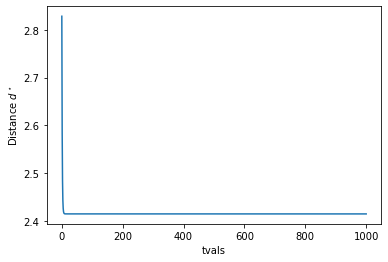

In [40]:
Dis=[]
for i in range(N):
    #compute the distance between puppy and kitten for each tvals
    Dis.append(np.sqrt((x[i]-rvals[i])**2+(y[i]-svals[i])**2))
plt.plot(tvals,Dis)
plt.ylabel(r'Distance $d^\star$')
plt.xlabel('tvals')
print('Final distance between puppy and kitten = ',np.sqrt((x[-1]-rvals[-1])**2+(y[-1]-svals[-1])**2),'at T = ',T)


### Fix h change T:

For $T = 100$, $h=0.001$, $d^\star = 2.414286797634773$ 

For $T = 1000$, $h=0.001$, $d^\star = 2.4132868144713484$ 

### Fix T change h:

For $T = 1000$, $h=0.01$, $d^\star = 2.4049470033769467$

For $T = 1000$, $h=0.001$, $d^\star = 2.4132868144713484$

For $T = 1000$, $h=0.0001$, $d^\star = 2.414121064033907$

For $T = 1000$, $h=0.00005$, $d^\star = 2.414167439204448$

If we take $T = 1000$, $h=0.00005$ to be our excat in this case, then the errors are as follows:

$T = 1000$, $h=0.01$: error of size $\approx 9.22 \times {10}^{-3}$

$T = 1000$, $h=0.001$: error of size $\approx 8.80\times {10}^{-4}$

$T = 1000$, $h=0.0001$: error of size $\approx 4.64 \times {10}^{-5}$

The final estimate of $d^\star=2.41$. According to the plot, it's enough to take $T=1000$ to represent $t \to \infty$. Then $d^\star$ calculated by the Euclidean distance between the puppy and kitten at the final point. Under different stepsizes, I found that $d^\star$ converges to 2.41 in three significant figures. In terms of the source of the error in this computation, the main source of error is the stepsize from the result above. 

Furthermore, from the three errors we had above, changing $h$ by a factor of 10 leads to the error size decrease by factor 10.